In [119]:
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [120]:
df_train = pd.read_csv("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/data/processed/df_train_processed.csv")
df_train

,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [121]:
df_test = pd.read_csv("/Users/aswathshakthi/PycharmProjects/MLOps/Predictive_maintenance/data/processed/df_test_processed.csv")
df_test

,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,112
1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,112
2,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,112
3,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,112
4,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,20
13092,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,20
13093,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,20
13094,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,20


In [122]:
# Assume df_train and df_test are already loaded DataFrames with 'RUL' as the target variable

X_train = df_train.drop(columns=['RUL'])
y_train = df_train[['RUL']]
X_test = df_test.drop(columns=['RUL'])
y_test = df_test[['RUL']]

In [123]:
# Normalisation
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [124]:
import numpy as np
# log transform stabilises variance and makes distribution more comparable
# Transform target variable
y_train_normalized = np.log(y_train + 1)
y_test_normalized = np.log(y_test + 1)

In [125]:

from sklearn.model_selection import train_test_split

X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train_normalized, y_train_normalized, test_size=0.2, random_state=42)

### Model

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Initialize RandomForest with suggested hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # 5-fold cross-validation on the train set
    cv_scores = cross_val_score(model, X_train_part, y_train_part, cv=5, scoring='r2')
    
    return cv_scores.mean()

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

# Get the best hyperparameters
print(f'Best hyperparameters: {study.best_params}')

[I 2024-09-07 00:48:07,240] A new study created in memory with name: no-name-58e9cce5-129b-4bdc-bf16-e3df8368f39d
[I 2024-09-07 00:48:12,797] Trial 0 finished with value: 0.8804118586748201 and parameters: {'n_estimators': 403, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.8804118586748201.
[I 2024-09-07 00:48:15,734] Trial 1 finished with value: 0.8756813922644391 and parameters: {'n_estimators': 259, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 0 with value: 0.8804118586748201.
[I 2024-09-07 00:48:18,822] Trial 2 finished with value: 0.8775864595326723 and parameters: {'n_estimators': 299, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8804118586748201.
[I 2024-09-07 00:48:19,673] Trial 3 finished with value: 0.7750731158185118 and parameters: {'n_estimators': 138, 'max_depth': 2, '

Best hyperparameters: {'n_estimators': 499, 'max_depth': 49, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [127]:
best_model = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train_part, y_train_part)

RandomForestRegressor(max_depth=49, max_features='sqrt', min_samples_split=4,
                      n_estimators=499, n_jobs=-1, random_state=42)

In [128]:
# Predict on train, validation, and test sets
y_train_pred = best_model.predict(X_train_part)
y_valid_pred = best_model.predict(X_valid)
y_test_pred = best_model.predict(X_test_normalized)

In [129]:
y_train_pred = np.expm1(y_train_pred)
y_valid_pred = np.expm1(y_valid_pred)
y_test_pred = np.expm1(y_test_pred)

y_train_original = np.expm1(y_train_part)
y_valid_original = np.expm1(y_valid)
y_test_original = np.expm1(y_test_normalized)

 ### Evaluation

In [130]:
r2_train = r2_score(y_train_original, y_train_pred)
r2_valid = r2_score(y_valid_original, y_valid_pred)
r2_test = r2_score(y_test_original, y_test_pred)

print(f'R-squared - Train: {r2_train}')
print(f'R-squared - Validation: {r2_valid}')
print(f'R-squared - Test: {r2_test}')

R-squared - Train: 0.9397595152838898
R-squared - Validation: 0.7201779810395104
R-squared - Test: -3.1619381019748607


In [131]:
mse_train = mean_squared_error(y_train_original, y_train_pred)
mse_valid = mean_squared_error(y_valid_original, y_valid_pred)
mse_test = mean_squared_error(y_test_original, y_test_pred)

print(f'MSE - Train: {mse_train}')
print(f'MSE - Validation: {mse_valid}')
print(f'MSE - Test: {mse_test}')

MSE - Train: 288.42872960740505
MSE - Validation: 1278.4494760028142
MSE - Test: 7129.209957889584


### Validation Plot

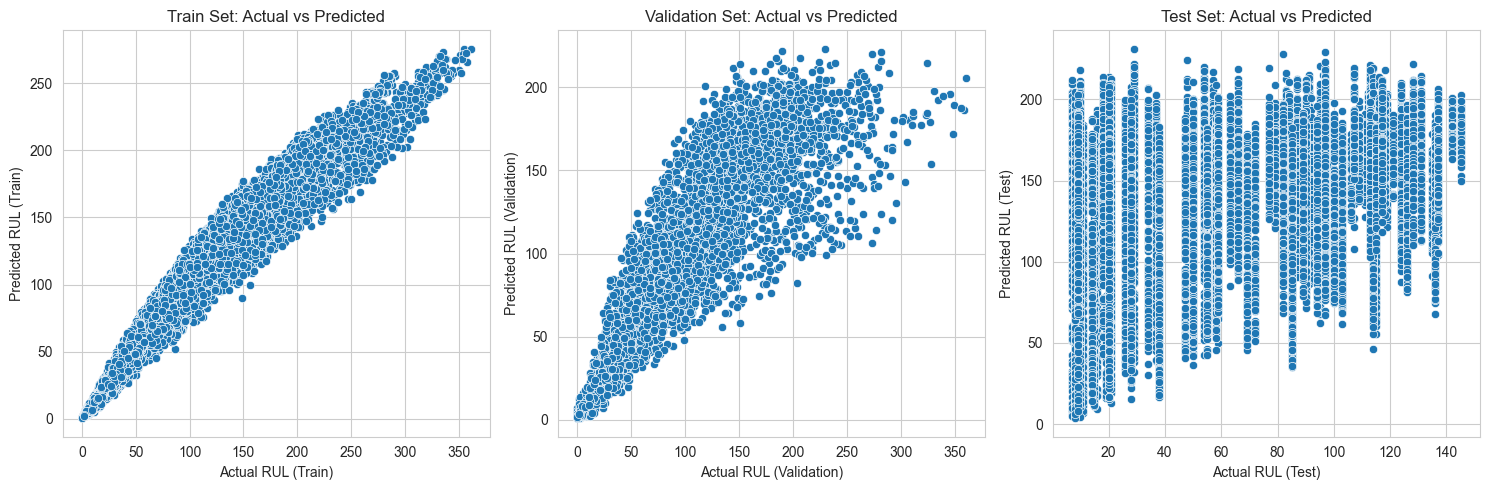

In [132]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Convert DataFrame to NumPy array and flatten
y_train_original_flat = np.ravel(y_train_original.values)
y_train_pred_flat = np.ravel(y_train_pred)
y_valid_original_flat = np.ravel(y_valid_original.values)
y_valid_pred_flat = np.ravel(y_valid_pred)
y_test_original_flat = np.ravel(y_test_original.values)
y_test_pred_flat = np.ravel(y_test_pred)

# Plot for Train set
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_train_original_flat, y=y_train_pred_flat)
plt.xlabel('Actual RUL (Train)')
plt.ylabel('Predicted RUL (Train)')
plt.title('Train Set: Actual vs Predicted')

# Plot for Validation set
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_valid_original_flat, y=y_valid_pred_flat)
plt.xlabel('Actual RUL (Validation)')
plt.ylabel('Predicted RUL (Validation)')
plt.title('Validation Set: Actual vs Predicted')

# Plot for Test set
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_original_flat, y=y_test_pred_flat)
plt.xlabel('Actual RUL (Test)')
plt.ylabel('Predicted RUL (Test)')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

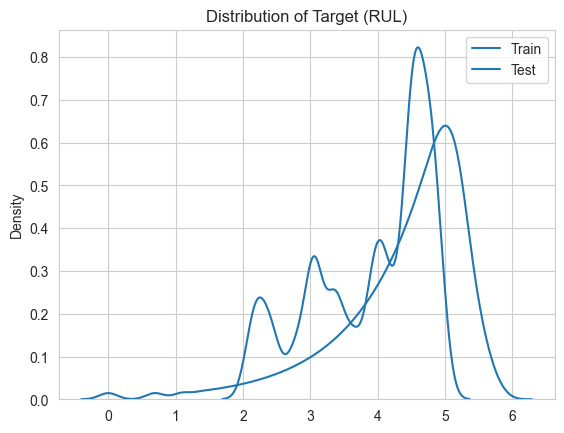

In [133]:
sns.kdeplot(y_train_normalized, label='Train')
sns.kdeplot(y_test_normalized, label='Test')
plt.title('Distribution of Target (RUL)')
plt.legend()
plt.show()